In [ ]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install required packages
install("sentence-transformers")
install("bertopic")
install("pandas")


In [1]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import pickle

# TASK 1: Read the Clustered Data
def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip().strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Ensure cluster label is an integer
        cluster_label = int(cluster_label)
        
        # Save clustered stories to individual files
        cluster_file_name = f"cluster_{cluster_label}.txt"
        cluster_group['text'].to_csv(cluster_file_name, index=False, header=False)
        
        # Print number of stories saved
        num_stories = cluster_group.shape[0]
        print(f"{num_stories} stories saved to {cluster_file_name}")

# TASK 2: Perform the Documents by Topics:
def perform_topic_modeling(cluster_directory):
    # Load a pre-trained BERT model from sentence-transformers
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    
    # Dictionary to store documents and embeddings by cluster
    clustered_data = {}

    # Read the cluster files and encode the documents
    for cluster_num in range(4):
        cluster_file = os.path.join(cluster_directory, f'cluster_{cluster_num}.txt')
        with open(cluster_file, 'r', encoding='utf-8') as file:
            documents = [line.strip() for line in file.readlines()]
            embeddings = model.encode(documents)
            clustered_data[f'cluster_{cluster_num}'] = (documents, embeddings)

    # Dictionary to store topic models and topics for each cluster
    topics_per_cluster = {}

    # Perform topic modeling on the documents and embeddings for each cluster
    for cluster_label, (documents, embeddings) in clustered_data.items():
        topic_model = BERTopic()
        topics, probabilities = topic_model.fit_transform(documents, embeddings)
        topics_per_cluster[cluster_label] = {
            'topic_model': topic_model,
            'topics': topics,
            'probabilities': probabilities
        }

    # Save the topic models and topics for all clusters
    with open('topics_per_cluster.pkl', 'wb') as f:
        pickle.dump(topics_per_cluster, f)

    print("Topic modeling completed for all clusters.")

# Example usage
clustered_file_path = 'clustered_BERT_500.csv'  # Update with your file path
tokenized_data_path = 'tokenizedFine_500.json'  # Update with your tokenized data file path
cluster_directory = '.'  # Directory where the cluster files will be saved

read_clustered_data(clustered_file_path, tokenized_data_path)
perform_topic_modeling(cluster_directory)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
2024-06-14 22:05:27.257330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


28 stories saved to cluster_0.txt
119 stories saved to cluster_1.txt
185 stories saved to cluster_2.txt
168 stories saved to cluster_3.txt
Topic modeling completed for all clusters.


##### Showcase the Topic Models 

In [3]:
def display_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = topic_model.get_topics()
        print(f"\nTopics for {cluster_label}:")
        for topic_num, topic in topics.items():
            print(f"Topic {topic_num}: {topic[:10]}")  # Print top 10 words for each topic


In [4]:
import pickle

def load_topic_models(file_path):
    with open(file_path, 'rb') as f:
        topics_per_cluster = pickle.load(f)
    return topics_per_cluster

# Load the topic models
file_path = 'topics_per_cluster.pkl'
topics_per_cluster = load_topic_models(file_path)

# Print loaded topics_per_cluster to verify content
print(topics_per_cluster)


{'cluster_0': {'topic_model': <bertopic._bertopic.BERTopic object at 0x1b4dd89b0>, 'topics': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 'probabilities': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, 'cluster_1': {'topic_model': <bertopic._bertopic.BERTopic object at 0x1b3921400>, 'topics': [-1, 0, -1, -1, -1, -1, -1, 2, 2, -1, -1, 1, 1, 0, -1, -1, -1, 1, -1, 0, -1, 1, 0, -1, 2, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 0, -1, -1, 1, -1, -1, -1, -1, -1, 2, -1, -1, 0, -1, -1, -1, -1, -1, 1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 2, -1, -1, -1, 2, -1, 0, -1, -1, -1, -1, 2, -1, 1, 0, 2, 2, 0, -1, -1, -1, -1, -1, 1, 0, -1, -1, 0, 0, 1, -1, -1, -1, -1, 0, 2, -1, -1, 1, 0, -1, -1, -1, -1, 0, 2, 1, -1], 'probabilities': array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.97

In [17]:
def display_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = topic_model.get_topics()
        print(f"\nTopics for {cluster_label}:")
        print(f"Number of topics: {len(topics)}")  # Print number of topics
        for topic_num, topic in topics.items():
            print(f"Topic {topic_num}: {topic[:10]}")  # Print top 10 words for each topic


In [18]:
import matplotlib.pyplot as plt

def visualize_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        try:
            fig = topic_model.visualize_topics()
            plt.title(f"Topics for {cluster_label}")
            plt.show()
        except Exception as e:
            print(f"Error visualizing topics for {cluster_label}: {str(e)}")

# Assuming topics_per_cluster is already loaded from topics_per_cluster.pkl
visualize_topics(topics_per_cluster)


Error visualizing topics for cluster_0: zero-size array to reduction operation maximum which has no identity
Error visualizing topics for cluster_1: zero-size array to reduction operation maximum which has no identity
Error visualizing topics for cluster_2: arrays used as indices must be of integer (or boolean) type
Error visualizing topics for cluster_3: arrays used as indices must be of integer (or boolean) type


Cluster: cluster_0
Topics: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Error visualizing topics for cluster_0: arrays used as indices must be of integer (or boolean) type
Cluster: cluster_1
Topics: [-1, 0, -1, -1, -1, -1, -1, 2, 2, -1, -1, 1, 1, 0, -1, -1, -1, 1, -1, 0, -1, 1, 0, -1, 2, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 0, -1, -1, 1, -1, -1, -1, -1, -1, 2, -1, -1, 0, -1, -1, -1, -1, -1, 1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 2, -1, -1, -1, 2, -1, 0, -1, -1, -1, -1, 2, -1, 1, 0, 2, 2, 0, -1, -1, -1, -1, -1, 1, 0, -1, -1, 0, 0, 1, -1, -1, -1, -1, 0, 2, -1, -1, 1, 0, -1, -1, -1, -1, 0, 2, 1, -1]
Probabilities: [0.         1.         0.         0.         0.         0.
 0.         0.97402862 1.         0.         0.         0.91538583
 0.89536339 1.         0.         0.         0.        

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


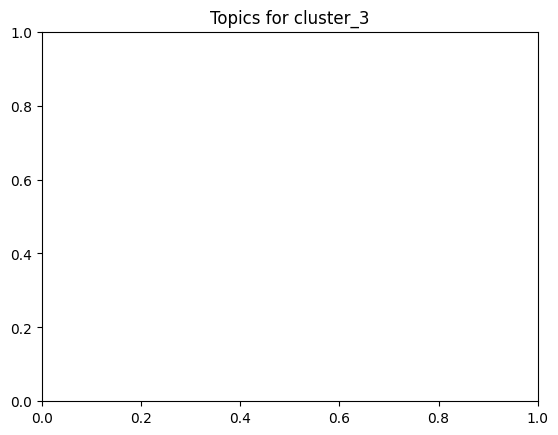

In [5]:
import matplotlib.pyplot as plt

def visualize_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = data['topics']
        probabilities = data['probabilities']
        
        try:
            # Check topics and probabilities before visualization
            print(f"Cluster: {cluster_label}")
            print(f"Topics: {topics}")
            print(f"Probabilities: {probabilities}")
            
            # Visualize topics
            fig = topic_model.visualize_topics()
            plt.title(f"Topics for {cluster_label}")
            plt.show()
        except Exception as e:
            print(f"Error visualizing topics for {cluster_label}: {str(e)}")

# Assuming topics_per_cluster is already loaded from topics_per_cluster.pkl
visualize_topics(topics_per_cluster)


In [20]:
import pickle

# Function to load the topic models from the pickle file
def load_topic_models(file_path):
    with open(file_path, 'rb') as file:
        topics_per_cluster = pickle.load(file)
    return topics_per_cluster

# File path to the pickle file
file_path = 'topics_per_cluster.pkl'

# Load the topic models
try:
    topics_per_cluster = load_topic_models(file_path)
    print("Pickle file loaded successfully.")
    
    # Print the keys to verify the structure
    print("Keys in the loaded data:", topics_per_cluster.keys())
    
    # Example: Print some information from the loaded data
    for cluster_label, data in topics_per_cluster.items():
        print(f"Cluster: {cluster_label}")
        print(f"Number of topics: {len(data['topics'])}")
        print(f"Number of probabilities: {len(data['probabilities'])}")
        print(f"Example topics: {data['topics'][:10]}")
        print(f"Example probabilities: {data['probabilities'][:10]}")
        print()
    
except Exception as e:
    print(f"Error loading pickle file: {e}")



Pickle file loaded successfully.
Keys in the loaded data: dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'])
Cluster: cluster_0
Number of topics: 98
Number of probabilities: 98
Example topics: [0, 1, 1, -1, -1, 0, 0, 0, -1, 0]
Example probabilities: [1.         1.         0.95181343 0.         0.         1.
 0.91357558 0.92984099 0.         0.88086612]

Cluster: cluster_1
Number of topics: 123
Number of probabilities: 123
Example topics: [1, -1, 0, -1, 0, -1, 1, 1, -1, 0]
Example probabilities: [1.         0.         1.         0.         0.7741955  0.
 1.         1.         0.         0.86117789]

Cluster: cluster_2
Number of topics: 58
Number of probabilities: 58
Example topics: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Example probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Cluster: cluster_3
Number of topics: 21
Number of probabilities: 21
Example topics: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Example probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



In [22]:
def assign_documents_to_topics(topics_per_cluster):
    classified_documents = {}

    for cluster_label, data in topics_per_cluster.items():
        topics = data['topics']
        probabilities = data['probabilities']

        # Create a dictionary to store document classifications by topics
        classified_documents[cluster_label] = {f'topic_{topic}': [] for topic in set(topics)}

        # Iterate through documents and assign them to topics based on probabilities
        for doc_index in range(len(probabilities)):
            max_topic_idx = topics[doc_index]
            if max_topic_idx != -1:
                topic_key = f'topic_{max_topic_idx}'
                classified_documents[cluster_label][topic_key].append(doc_index)

    return classified_documents

# Example usage
classified_docs = assign_documents_to_topics(topics_per_cluster)

# Print the classified documents for each cluster
for cluster_label, topics_dict in classified_docs.items():
    print(f"Cluster: {cluster_label}")
    for topic_key, doc_indices in topics_dict.items():
        print(f"Topic {topic_key}: {len(doc_indices)} documents")

Cluster: cluster_0
Topic topic_0: 36 documents
Topic topic_1: 22 documents
Topic topic_-1: 0 documents
Cluster: cluster_1
Topic topic_0: 46 documents
Topic topic_1: 37 documents
Topic topic_-1: 0 documents
Cluster: cluster_2
Topic topic_-1: 0 documents
Cluster: cluster_3
Topic topic_-1: 0 documents


In [23]:
def get_topic_keywords(topics_per_cluster):
    topic_keywords = {}

    for cluster_label, data in topics_per_cluster.items():
        topics = data['topics']
        topic_model = data['topic_model']  # Assuming you have access to the BERTopic object

        # Get topics with keywords from BERTopic
        topics_keywords = topic_model.get_topics()

        # Store topics and keywords
        topic_keywords[cluster_label] = {
            f'topic_{topic_num}': keywords[:10]  # Assuming you want to get top 10 keywords per topic
            for topic_num, keywords in topics_keywords.items() if topic_num in set(topics)
        }

    return topic_keywords

# Example usage
topic_keywords = get_topic_keywords(topics_per_cluster)

# Print or use topic_keywords dictionary as needed
for cluster_label, topics_data in topic_keywords.items():
    print(f"Cluster: {cluster_label}")
    for topic_key, keywords in topics_data.items():
        print(f"Topic {topic_key}: {keywords}")


Cluster: cluster_0
Topic topic_-1: [('school', 0.033373692121562874), ('company', 0.031216665033610414), ('ai', 0.029117901302526526), ('new', 0.02767346700028996), ('year', 0.02734000623352968), ('technology', 0.02628171783550857), ('tool', 0.023919292084424035), ('time', 0.019901565581084642), ('one', 0.01989954742980924), ('chatgpt', 0.019265406462875372)]
Topic topic_0: [('company', 0.03390097855673611), ('ai', 0.028230041150001575), ('new', 0.027593570930056252), ('google', 0.02579257479740746), ('technology', 0.023782677122833433), ('year', 0.023709284164320357), ('generative', 0.021080608720773032), ('one', 0.019926807181321702), ('openai', 0.019866057967612743), ('tool', 0.019394945953819773)]
Topic topic_1: [('company', 0.035909256220474126), ('new', 0.03288411642871309), ('image', 0.03261165271780897), ('technology', 0.03064174947313116), ('ai', 0.027058740022584772), ('openai', 0.026101025572528205), ('microsoft', 0.02490968491208882), ('time', 0.024299148372854063), ('artif